<a href="https://colab.research.google.com/github/Delonix7/My_Data_Science_Projects/blob/main/G2M_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno

## Importing Data using publicly available sharable link

In [ ]:
# !wget -O City.csv https://drive.google.com/file/d/1DlslWrbA6Phvh5Pyk2b30OGP6wBi4dkr/view?usp=sharing
# !wget -O Cab_Data.csv https://drive.google.com/file/d/1DlKCKYYo71FhzqNa23ukE_cU46uq0Ug8/view?usp=sharing
# !wget -O Transaction_ID.csv https://drive.google.com/file/d/1DuTGOdWSuhpXawr4IfNID1Tq01Rzn-Vt/view?usp=sharing
# !wget -O Customer_ID.csv https://drive.google.com/file/d/1DpaTvigkQNOmr4teymhbb5ITpWkKuaZ0/view?usp=sharing 

# #saving uploaded files into panda dataframes
# city_data = pd.read_csv ('City.csv')
# cab_data = pd.read_csv ('Cab_Data.csv')
# transaction_id_data = pd.read_csv ('Transaction_ID.csv')
# customer_id_data = pd.read_csv ('Customer_ID.csv')


##Importing data using private credentials

In [ ]:
#authenticate colabs to allow access to Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def get_data(url, file_name):
  dataframe_name = pd.DataFrame()
  data_url_list = url.split('/')
  downloaded = drive.CreateFile({'id':data_url_list[5]})
  downloaded.GetContentFile(file_name)
  dataframe_name = pd.read_csv(file_name)
  return dataframe_name

cab_data_url = 'https://drive.google.com/file/d/1DlKCKYYo71FhzqNa23ukE_cU46uq0Ug8/view?usp=sharing'
city_data_url = 'https://drive.google.com/file/d/1DlslWrbA6Phvh5Pyk2b30OGP6wBi4dkr/view?usp=sharing'
customer_id_url = 'https://drive.google.com/file/d/1DpaTvigkQNOmr4teymhbb5ITpWkKuaZ0/view?usp=sharing'
transaction_id_url = 'https://drive.google.com/file/d/1DuTGOdWSuhpXawr4IfNID1Tq01Rzn-Vt/view?usp=sharing'
cab_file_name = 'cab_data.csv'
city_file_name = 'city_data.csv'
customer_id_file_name = 'customer_id.csv'
transaction_id_file_name = 'transaction_id.csv'
cab_data = get_data(cab_data_url, cab_file_name)
city_data =  get_data(city_data_url, city_file_name)
customer_id_data = get_data(customer_id_url, customer_id_file_name)
transaction_id_data = get_data(transaction_id_url, transaction_id_file_name)

### Merging Dataframes

In [ ]:
#merging transaction_id and cab_data using the Transaction ID column
cab_transaction = pd.merge(transaction_id_data, cab_data, on= "Transaction ID")
#merging the Customer_id and Transaction_id dataframes
customer_transaction = pd.merge(customer_id_data, transaction_id_data, on= 'Customer ID')
# merging customer_transaction with cab_transaction
cab_customer_transaction = pd.merge(customer_transaction, cab_transaction, on= ['Customer ID', 'Transaction ID' ,'Payment_Mode'])
# merging cab_customer_transaction with city
final_cab_data = pd.merge(cab_customer_transaction, city_data, on= 'City')

##Data Preprocessing

In [ ]:
final_cab_data.tail(2)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
359390,51406,Female,29,6829,10358624,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"
359391,51406,Female,29,6829,10370709,Card,43342,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,"418,859","127,001"


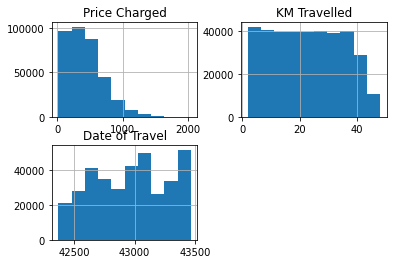

In [ ]:
final_cab_data[['Price Charged', 'KM Travelled', 'Date of Travel']].hist()
plt.show()

##### Converting Date of Travel from int to DateTime

In [ ]:
final_cab_data.dtypes

Customer ID             int64
Gender                 object
Age                     int64
Income (USD/Month)      int64
Transaction ID          int64
Payment_Mode           object
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
dtype: object

In [ ]:
# converting Date of Travel from int to DateTime
from openpyxl.utils.datetime import from_excel
final_cab_data['Date of Travel'] = final_cab_data['Date of Travel'].apply(from_excel)
# final_cab_data['Date of Travel'] = pd.to_datetime(final_cab_data['Date of Travel']).dt.date

In [ ]:
final_cab_data.dtypes

Customer ID                    int64
Gender                        object
Age                            int64
Income (USD/Month)             int64
Transaction ID                 int64
Payment_Mode                  object
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Population                    object
Users                         object
dtype: object

In [ ]:
final_cab_data.head(2)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"


##### Setting Company as index

In [ ]:
# Setting Company as index
final_cab_data.set_index('Company', inplace= True)

In [ ]:
# Resetting index
# final_cab_data.reset_index(inplace= True)

In [ ]:
# yellow_cab_data = final_cab_data.loc['Yellow Cab', ['Gender', 'Age', 'Payment_Mode', 'Income (USD/Month)']]

In [ ]:
# This gives an error since Company is set as the index. Solution: ommit Company or reset index
# data = pd.DataFrame(final_cab_data[['Company', 'Gender', 'Age']])
# Example of resetting index: data.reset_index(inplace= True)
#  Example of ommitting 'Company' data = final_cab_data[['Gender', 'Age']]
# selecting a specific company with "Company" set as index
# pink_cab_data = final_cab_data.loc['Pink Cab',['Gender', 'Age', 'Payment_Mode', 'Income (USD/Month)']]

In [ ]:
final_cab_data.shape

(359392, 13)

##### Converting Column names to string 

In [ ]:
# # Example using the map function. Applies the function to the data.
# def addition (n):
#   return n+n

# print(tuple(map(addition, (9,3,5))))
# # output: [18, 6, 10]

In [ ]:
# # Converting column names to string
# final_cab_data.columns = list(map(str, final_cab_data.columns))
# [(type(x)) for x in final_cab_data.columns.values]

In [ ]:
# final_cab_data.columns

##### Converting objects to int

In [ ]:
#Users and Population are object and need to be converted to int64
# But first the commas need to be removed to allow convertion into int.

final_cab_data['Population'] = final_cab_data['Population'].str.replace(',' , '')
final_cab_data['Users'] = final_cab_data['Users'].str.replace(',' , '')
final_cab_data['Population'] = final_cab_data['Population'].astype('int')
final_cab_data['Users'] = final_cab_data['Users'].astype('int')
# Converting Customer ID to object
final_cab_data['Customer ID'] = final_cab_data['Customer ID'].astype('str')
#converting Transaction ID to object
final_cab_data['Transaction ID'] = final_cab_data['Transaction ID'].astype('str')

#### Filtering Based on a Column entry

In [ ]:
# final_cab_data[final_cab_data['Age'] == 60]

In [ ]:
# final_cab_data.reset_index(inplace = True)
# final_cab_data[final_cab_data['Company']== 'Yellow Cab']

In [ ]:
# #filtering based on multiple criteria
# final_cab_data[(final_cab_data['Company'] == 'Yellow Cab') & ((final_cab_data ['Age'] == 28) | (final_cab_data['Age'] ==31)) & (final_cab_data['Gender'] == 'Male')]

## Descriptive Statistics

In [ ]:
print(final_cab_data.dtypes)
print(f'The shape of the data:  {final_cab_data.shape}')

Customer ID                   object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Transaction ID                object
Payment_Mode                  object
Date of Travel        datetime64[ns]
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Population                     int64
Users                          int64
dtype: object
The shape of the data:  (359392, 13)


####Checking for Duplicate Entries

In [ ]:
print(f'Total number of Duplicate entries: {final_cab_data.duplicated().sum()}"')

Total number of Duplicate entries: 0"


####Missing Values

In [ ]:
#checking the total number of entries
final_cab_data.shape

(359392, 13)

In [ ]:
# % of null values
null_columns = pd.DataFrame(final_cab_data[final_cab_data.columns[final_cab_data.isnull().any()]].isnull().sum() * 100/final_cab_data.shape[0], columns= ['Percentage of NaN values'])
null_columns['Total NaN Values'] = final_cab_data[final_cab_data.columns[final_cab_data.isnull().any()]].isnull().sum()
null_columns

,Percentage of NaN values,Total NaN Values


In [ ]:
final_cab_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

No null Values in the dataset!

## Exploratory Data Analysis

### Hypothesis 1: Is there a difference in the distribution of total profit for each cab company across different cities?

In [ ]:
final_cab_data.reset_index(inplace= True)
yellowcab =final_cab_data[(final_cab_data['Company'] == 'Yellow Cab')]
pinkcab = final_cab_data[(final_cab_data['Company'] == 'Pink Cab')]

In [ ]:
cities = list(city_data['City'].unique())
cities.remove('SAN FRANCISCO CA')

In [ ]:
yellowcab_profits = yellowcab[['City', 'Date of Travel','Price Charged', 'Cost of Trip']]
yellowcab_profits['Profit'] = yellowcab_profits['Price Charged'] - yellowcab_profits['Cost of Trip']
yellowcab_profits

In [ ]:
pinkcab_profits = pinkcab[['City', 'Date of Travel', 'Price Charged', 'Cost of Trip']]
pinkcab_profits['Profit'] = pinkcab_profits['Price Charged'] - pinkcab_profits['Cost of Trip']
pinkcab_profits

In [ ]:
pinkcab_profits

,City,Date of Travel,Price Charged,Cost of Trip,Profit
0,ATLANTA GA,2016-01-08,370.95,313.635,57.315
3,ATLANTA GA,2016-01-06,358.52,334.854,23.666
6,ATLANTA GA,2018-10-27,167.03,141.934,25.096
7,ATLANTA GA,2016-01-02,125.20,97.632,27.568
11,ATLANTA GA,2016-01-07,377.40,351.602,25.798
...,...,...,...,...,...
359332,WASHINGTON DC,2017-07-23,347.58,218.484,129.096
359346,WASHINGTON DC,2017-11-19,61.95,50.616,11.334
359356,WASHINGTON DC,2018-12-02,565.07,434.070,131.000
359358,WASHINGTON DC,2017-07-23,375.27,368.832,6.438


In [ ]:
# creating a new dataframe of Yellowcab total income per city  
yellowcab_dict = {} #empty dictionary
for c in cities: #loop to append city and total income to dictionary
  sum =yellowcab_profits.loc[yellowcab_profits['City'] == c, 'Profit'].sum()
  yellowcab_dict[c] = sum

yellowcab_sums = pd.DataFrame(yellowcab_dict, index = [0]).transpose() #converts to a dataframe and transpose the data
yellowcab_sums.reset_index(inplace = True)
yellowcab_sums.rename(columns = {'index': 'City', 0: 'Total Profit'}, inplace= True)
yellowcab_sums.set_index('City', inplace= True)

In [ ]:
yellowcab_sums.head()

,Total Profit
City,
NEW YORK NY,2.645108e+07
CHICAGO IL,3.068591e+06
LOS ANGELES CA,3.285977e+06
MIAMI FL,5.960001e+05
SILICON VALLEY,9.764547e+05


In [ ]:
# creating a new dataframe of Pinkcab total income per city  
pinkcab_dict = {}
for c in cities:
  sum = pinkcab_profits.loc[pinkcab_profits['City'] == c, 'Profit'].sum()
  pinkcab_dict[c] = sum

pinkcab_sums = pd.DataFrame(pinkcab_dict, index = [0]).transpose()
pinkcab_sums.reset_index(inplace = True)
pinkcab_sums.rename(columns = {'index': 'City', 0: 'Total Profit'}, inplace= True)
pinkcab_sums.set_index('City', inplace= True)

In [ ]:
pinkcab_sums.head()

,Total Profit
City,
NEW YORK NY,1511474.388
CHICAGO IL,318722.488
LOS ANGELES CA,1125732.065
MIAMI FL,162301.191
SILICON VALLEY,340250.531


In [ ]:
# pinkcab_sums['Company'] = 'Pink Cab'
# yellowcab_sums['Company'] = 'Yellow Cab'
# cabs = pd.concat([yellowcab_sums, pinkcab_sums], axis = 0)

In [ ]:
# #older versions of matplotlib may fail to run the code for plotting the graph correctly 
# #upgrade the version
# !pip install matplotlib --upgrade

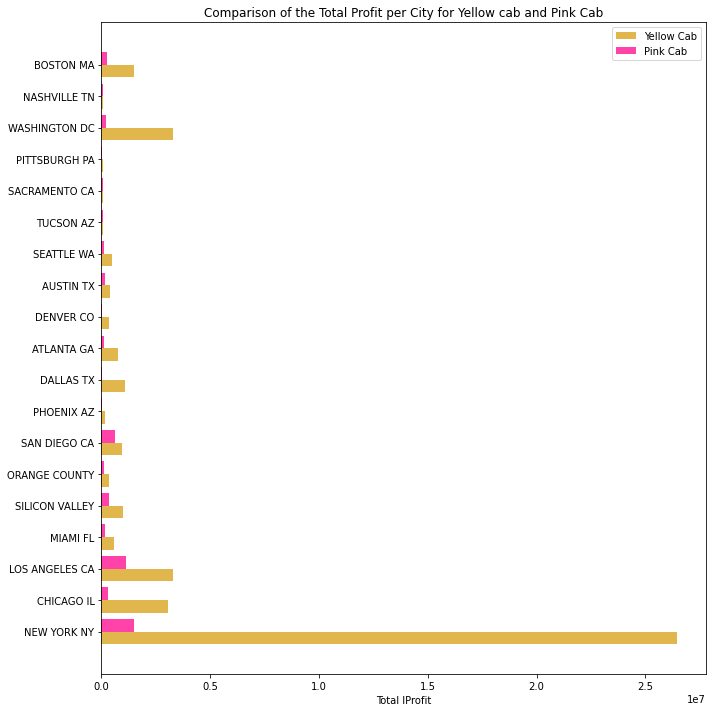

In [ ]:
labels = cities
y = np.arange(len(labels))
width = 0.40

fig, ax = plt.subplots(figsize= (10,10))
rects1 = ax.barh(y - width/2, list(yellowcab_sums['Total Profit']), width, label= 'Yellow Cab', color = 'goldenrod', alpha =0.8)
rects2 = ax.barh(y + width/2, list(pinkcab_sums['Total Profit']), width, label= 'Pink Cab', color = 'deeppink', alpha = 0.8)

ax.set_xlabel("Total IProfit")
ax.set_title("Comparison of the Total Profit per City for Yellow cab and Pink Cab")
ax.set_yticks(y, labels)
ax.legend()

fig.tight_layout()

plt.show()

### Hypothesis 2: Does profit for each cab company change significantly from one year to the next?

In [ ]:
yellowcab.head()

In [ ]:
yellowcab_2016 = (yellowcab_profits[(yellowcab_profits['Date of Travel'] >= '2016-01-01') & (yellowcab_profits['Date of Travel'] <= '2016-12-31')])
yellowcab_2017 = (yellowcab_profits[(yellowcab_profits['Date of Travel'] >= '2017-01-01') & (yellowcab_profits['Date of Travel'] <= '2017-12-31')])
yellowcab_2018 = (yellowcab_profits[(yellowcab_profits['Date of Travel'] >= '2018-01-01') & (yellowcab_profits['Date of Travel'] <= '2018-12-31')])

In [ ]:
 yellowcab_2016 = yellowcab_2016[ 'Profit' ].sum()
yellowcab_2017 = yellowcab_2017['Profit'].sum()
yellowcab_2018 = yellowcab_2018['Profit'].sum()

In [ ]:
print(f'Yellowcab \n 2016: ', yellowcab_2016, '\n2017: ', yellowcab_2017, '\n2018: ', yellowcab_2018)

Yellowcab 
 2016:  13926995.431600003 
2017:  16575977.967999998 
2018:  13517399.7712


In [ ]:
yellowcab_profits_yearly = (pd.DataFrame({'2016': yellowcab_2016, '2017': yellowcab_2017, '2018': yellowcab_2018}, index= [0])).T

In [ ]:
yellowcab_profits_yearly.reset_index(inplace= True)

In [ ]:
yellowcab_profits_yearly.rename(columns= {0: 'Profit'}, inplace= True)

In [ ]:
yellowcab_profits_yearly

,Year,Profit
0,2016,1.392700e+07
1,2017,1.657598e+07
2,2018,1.351740e+07


In [ ]:
fig, ax = plt.subplots(figsize= (10,10))
yellowcab_profits_yearly.plot.line(figsize= (10,8))